In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
dataset_path = kagglehub.dataset_download("awsaf49/cbis-ddsm-breast-cancer-image-dataset")
image_dir = os.path.join(dataset_path, "images")

100%|██████████| 4.95G/4.95G [01:03<00:00, 84.3MB/s]

Extracting files...


In [ ]:
def load_images(image_dir, img_size=(224, 224)):
    images = []
    labels = []
    for label in os.listdir(image_dir):
        class_path = os.path.join(image_dir, label)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(0 if label == "benign" else 1)  # Assuming two classes
    return np.array(images), np.array(labels)


In [ ]:
print("Dataset downloaded to:", dataset_path)
print("Contents:", os.listdir(dataset_path))  # Check files & folders


Dataset downloaded to: /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1
Contents: ['csv', 'jpeg']


In [ ]:
['images', 'metadata.csv', 'README.md']
image_dir = os.path.join(dataset_path, "images")  # Change based on actual structure

In [ ]:
image_dir = os.path.join(dataset_path, "jpeg")
jpeg_path = os.path.join(dataset_path, "jpeg")
print("Contents of jpeg folder:", os.listdir(jpeg_path)[:10])  # Print first 10 files


Contents of jpeg folder: ['1.3.6.1.4.1.9590.100.1.2.248009716212314654110455505262082490433', '1.3.6.1.4.1.9590.100.1.2.150586274112163348618526888230648261161', '1.3.6.1.4.1.9590.100.1.2.394792236611156603001230316853617554862', '1.3.6.1.4.1.9590.100.1.2.204173776013736332214262798293950507299', '1.3.6.1.4.1.9590.100.1.2.47759147212856924416963526780900223664', '1.3.6.1.4.1.9590.100.1.2.132656983910181108503657484122092972733', '1.3.6.1.4.1.9590.100.1.2.214635822911235330416503361502619110769', '1.3.6.1.4.1.9590.100.1.2.428868892311612991922842180140211445323', '1.3.6.1.4.1.9590.100.1.2.279009357312590326405692300091346688718', '1.3.6.1.4.1.9590.100.1.2.284402166210743654813583379650458642794']


In [ ]:
first_subfolder = os.path.join(jpeg_path, os.listdir(jpeg_path)[0])
print(f"Contents of {first_subfolder}:", os.listdir(first_subfolder))

Contents of /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.248009716212314654110455505262082490433: ['2-222.jpg', '1-244.jpg']


In [ ]:
import pandas as pd

csv_path = os.path.join(dataset_path, "csv")
csv_files = os.listdir(csv_path)
print("CSV Files:", csv_files)  # Check available CSVs
df = pd.read_csv(os.path.join(csv_path, csv_files[0]))
print(df.head())


CSV Files: ['dicom_info.csv', 'calc_case_description_test_set.csv', 'calc_case_description_train_set.csv', 'mass_case_description_test_set.csv', 'meta.csv', 'mass_case_description_train_set.csv']
                                           file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1"
csv_path = os.path.join(dataset_path, "csv", "mass_case_description_train_set.csv")
jpeg_path = os.path.join(dataset_path, "jpeg")


In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df = df[['image file path', 'pathology']]
df['pathology'] = df['pathology'].map({'BENIGN': 0, 'MALIGNANT': 1})

In [ ]:
df['image file path'] = df['image file path'].apply(lambda x: os.path.join(jpeg_path, x.split("/")[-1]))

In [ ]:
def load_images(image_paths, labels, img_size=(224, 224)):
    images = []
    valid_labels = []

    for img_path, label in zip(image_paths, labels):
        if os.path.exists(img_path):  # Check if file exists
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            img = cv2.resize(img, img_size)  # Resize to 224x224
            images.append(img)
            valid_labels.append(label)

    return np.array(images), np.array(valid_labels)

In [ ]:
pip install pydicom pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.9 MB/s eta 0:00:00


In [ ]:
import pydicom
from PIL import Image
import numpy as np
import os

def dicom_to_jpeg(dicom_path, output_path):
    # Load DICOM file
    dicom_data = pydicom.dcmread(dicom_path)

    # Convert the DICOM pixel data to a PIL image
    img = Image.fromarray(dicom_data.pixel_array)

    # Save the image as JPEG
    img.save(output_path)

# Example conversion for the first few files
output_dir = "/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/"
os.makedirs(output_dir, exist_ok=True)

# Convert first few DICOM files in the dataset to JPEG (example)
for img_path in df['image file path'].head():
    dicom_path = '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/' + img_path
    output_path = dicom_path.replace('.dcm', '.jpg').replace('dicom', 'jpeg')

    if os.path.exists(dicom_path):
        dicom_to_jpeg(dicom_path, output_path)
        print(f"Converted: {dicom_path} -> {output_path}")
    else:
        print(f"Missing DICOM file: {dicom_path}")


Missing DICOM file: /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1//root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/000000.dcm
Missing DICOM file: /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1//root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/000000.dcm
Missing DICOM file: /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1//root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/000000.dcm
Missing DICOM file: /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1//root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/000000.dcm
Missing DICOM file: /root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1//root/.cache/kagglehub/datasets/aws

In [ ]:
import os

def find_dicom_files(base_dir):
    dicom_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.dcm'):
                dicom_files.append(os.path.join(root, file))
    return dicom_files

# Path to the root directory of the dataset
dataset_dir = "/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/"

# Search for DICOM files recursively in the dataset directory
dicom_files = find_dicom_files(dataset_dir)

# Print the first few found DICOM files
print(dicom_files[:10])  # Adjust to view more or less


[]


In [ ]:
def find_jpeg_files(base_dir):
    jpeg_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.jpg'):
                jpeg_files.append(os.path.join(root, file))
    return jpeg_files

jpeg_files = find_jpeg_files(dataset_dir)
print(jpeg_files[:10])  # Adjust to view more or less


['/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.248009716212314654110455505262082490433/2-222.jpg', '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.248009716212314654110455505262082490433/1-244.jpg', '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.150586274112163348618526888230648261161/1-226.jpg', '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.394792236611156603001230316853617554862/1-115.jpg', '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.204173776013736332214262798293950507299/1-008.jpg', '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.4775914721285692441

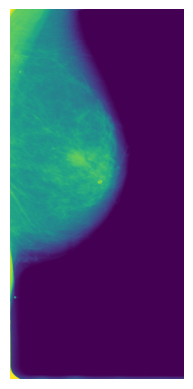

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Example: Load and display the first image
image_path = '/root/.cache/kagglehub/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset/versions/1/jpeg/1.3.6.1.4.1.9590.100.1.2.232179602411982479121262306963612746541/1-201.jpg'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()


In [ ]:
from PIL import Image
from torchvision import transforms

# Open the image and convert to RGB if it's grayscale
img = Image.open(image_path).convert('RGB')  # Convert to RGB

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Apply the transformations to the image
img_tensor = transform(img)


In [ ]:
import torch
from torchvision import models

# Load the pre-trained ResNet model
model = models.resnet18(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Add a batch dimension (as models expect batch input)
img_tensor = img_tensor.unsqueeze(0)  # Shape becomes [1, 3, 224, 224]

# Move tensor to the appropriate device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)
model = model.to(device)

# Make a prediction
with torch.no_grad():  # No need to track gradients for inference
    output = model(img_tensor)

# Get the predicted class
_, predicted_class = torch.max(output, 1)
print(f"Predicted class index: {predicted_class.item()}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 121MB/s]


Predicted class index: 666


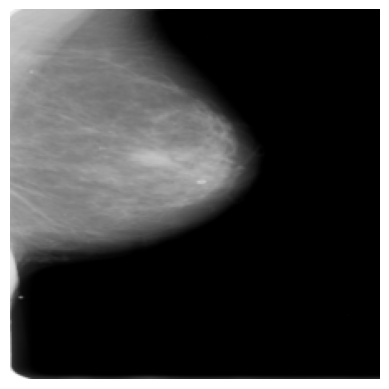

In [ ]:
# Remove the batch dimension by accessing the first element (as batch size is 1)
img_tensor = img_tensor.squeeze(0)  # Now the shape will be [C, H, W]

# Reverse the normalization
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Denormalize the image tensor
img_tensor = img_tensor * std[:, None, None] + mean[:, None, None]

# Convert to numpy array and display the image
img_np = img_tensor.permute(1, 2, 0).cpu().numpy()  # Convert from [C, H, W] to [H, W, C]
plt.imshow(img_np)
plt.axis('off')
plt.show()


In [ ]:
import torch
import torchvision.models as models
import torch.nn.functional as F

# Load the pretrained ResNet model
model = models.resnet18(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Make the prediction
with torch.no_grad():
    output = model(img_tensor.unsqueeze(0))  # Add batch dimension
    prob = F.softmax(output, dim=1)  # Apply softmax to get probabilities
    predicted_class = torch.argmax(prob, dim=1)

# Print the predicted class
print("Predicted class:", predicted_class.item())
print(f"Raw model output: {predicted_class.item()}")


Predicted class: 604
Raw model output: 604


In [ ]:
print(f"Predicted class index: {predicted_class.item()}")
predicted_class = torch.argmax(output, dim=1)

Predicted class index: 604


In [ ]:
# Check output size
print(f"Model output size: {output.size()}")


Model output size: torch.Size([1, 1000])


In [ ]:
# Example of a placeholder
class_labels = {i: f"Class_{i}" for i in range(623)}


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Define a simple Dataset class (if you're working with a custom dataset)
class BreastCancerDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Modify the final layer of ResNet for binary classification
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 2 classes: Malignant, Benign

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 83.0MB/s]


In [ ]:
def load_images(image_dir, img_size=(224, 224)):  # Remove 'labels' from parameters
    images = []
    labels = []
    for label in os.listdir(image_dir):
        class_path = os.path.join(image_dir, label)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(0 if label == "benign" else 1)  # Assuming two classes
    return np.array(images), np.array(labels)


In [ ]:
images, labels = load_images(image_dir, img_size=(224, 224))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 925s 4s/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 953s 3s/step - accuracy: 1.0000 - loss: 1.5782e-24 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 935s 4s/step - accuracy: 1.0000 - loss: 4.2729e-26 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 905s 3s/step - accuracy: 1.0000 - loss: 1.3143e-24 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 918s 3s/step - accuracy: 1.0000 - loss: 3.0012e-25 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 902ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%
